# Descripción
Un avión vuela con velocidad 
$V$
 a 
$Ha$
 metros del suelo en dirección a un cañón como se muestra en la figura.

El cañón tiene forma de trapecio isósceles invertido, de una altura 
$H
c$
, largo 
$L$
 y ángulo 
$α$
 con respecto al horizonte.

Cuando se encuentra a una distancia 
$d$
 del borde del cañón, el avión suelta una bomba.

![Imagen](im2.png)



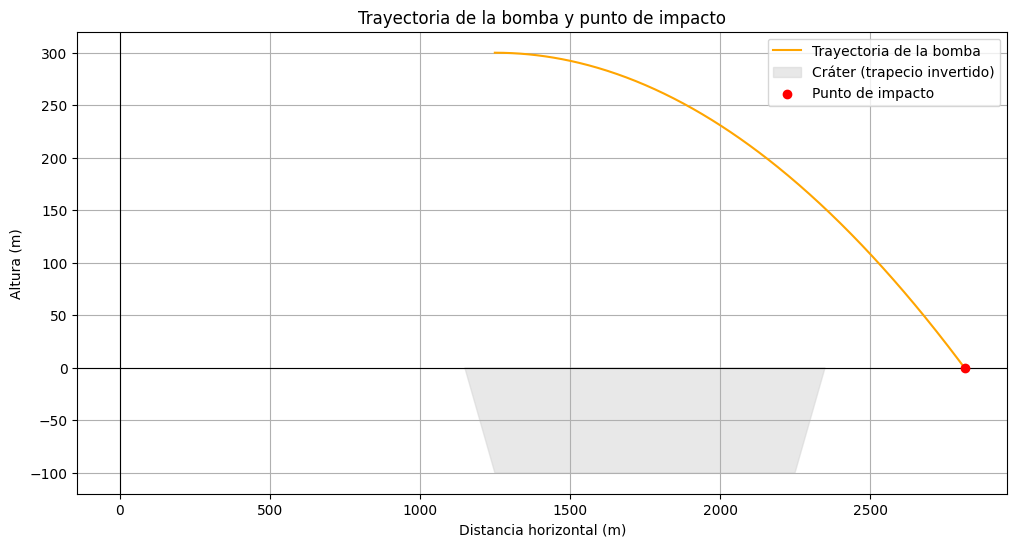

La bomba impactó fuera del cráter: x = 2816.07 m, y = 0.00 m


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
ha = 300  # Altura inicial de la bomba
hc = -100  # Profundidad del cráter (negativa porque está debajo del eje x)
L = 1000  # Longitud total del cráter
alpha = np.radians(45)  # Ángulo del cráter en radianes
d = 1250  # Distancia desde el punto de lanzamiento al inicio del cráter
v0 = 200  # Velocidad inicial de la bomba

# Componentes de la velocidad inicial
v0x = v0  # Velocidad horizontal
v0y = 0   # Velocidad vertical inicial

g = 9.81  # Aceleración gravitacional

# Validación de parámetros
if alpha <= 0 or hc >= 0:
    raise ValueError("El ángulo debe ser mayor a 0 y la profundidad del cráter (hc) debe ser negativa.")

# Función para calcular la trayectoria
def trayectoria(x, x0, y0, v0x, v0y):
    t = (x - x0) / v0x
    return y0 + v0y * t - 0.5 * g * t**2

# Función para calcular la altura del cráter en función de x
def altura_crater(x):
    if d <= x <= d + (hc / np.tan(alpha)):  # Lado inclinado izquierdo
        return np.tan(alpha) * (x - d)
    elif d + (hc / np.tan(alpha)) < x < d + L - (hc / np.tan(alpha)):  # Fondo plano
        return 0
    elif d + L - (hc / np.tan(alpha)) <= x <= d + L:  # Lado inclinado derecho
        return np.tan(-alpha) * (x - (d + L))
    return None  # Fuera del cráter

# Coordenadas del cráter
x_crater = np.array([
    d,
    d + (hc / np.tan(alpha)),
    d + L - (hc / np.tan(alpha)),
    d + L
])
y_crater = np.array([hc, 0, 0, hc])

# Trayectoria de la bomba
x0 = d  # Posición inicial
y0 = ha  # Altura inicial
x_trayectoria = np.linspace(x0, x0 + L + 2 * d, 1000)
y_trayectoria = trayectoria(x_trayectoria, x0, y0, v0x, v0y)

# Buscar el punto de impacto
impacto_x = None
impacto_y = None

for i in range(len(x_trayectoria)):
    x_actual = x_trayectoria[i]
    y_actual = y_trayectoria[i]
    y_crater_actual = altura_crater(x_actual)

    if y_crater_actual is not None and y_actual <= y_crater_actual:  # Impacto dentro del cráter
        impacto_x = x_actual
        impacto_y = y_crater_actual
        break
    elif y_actual <= 0 and (x_actual < d or x_actual > d + L):  # Impacto fuera del cráter
        impacto_x = x_actual
        impacto_y = 0
        break

# Visualización
if impacto_x is not None and impacto_y is not None:
    x_trayectoria_recortada = x_trayectoria[x_trayectoria <= impacto_x]
    y_trayectoria_recortada = y_trayectoria[:len(x_trayectoria_recortada)]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_trayectoria_recortada, y_trayectoria_recortada, label="Trayectoria de la bomba", color="orange")
    plt.fill(x_crater, y_crater, color="lightgrey", label="Cráter (trapecio invertido)", alpha=0.5)

    plt.scatter(impacto_x, impacto_y, color="red", label="Punto de impacto", zorder=5)

    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title("Trayectoria de la bomba y punto de impacto")
    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.legend()
    plt.grid()
    plt.show()

    # Mensaje dependiendo del impacto
    if d <= impacto_x <= d + L:  # Impacto dentro del rango horizontal del cráter
        print(f"La bomba impactó dentro del cráter: x = {impacto_x:.2f} m, y = {impacto_y:.2f} m")
    else:  # Impacto fuera del rango del cráter
        print(f"La bomba impactó fuera del cráter: x = {impacto_x:.2f} m, y = {impacto_y:.2f} m")
else:
    print("No se encontró un impacto dentro del rango calculado.")



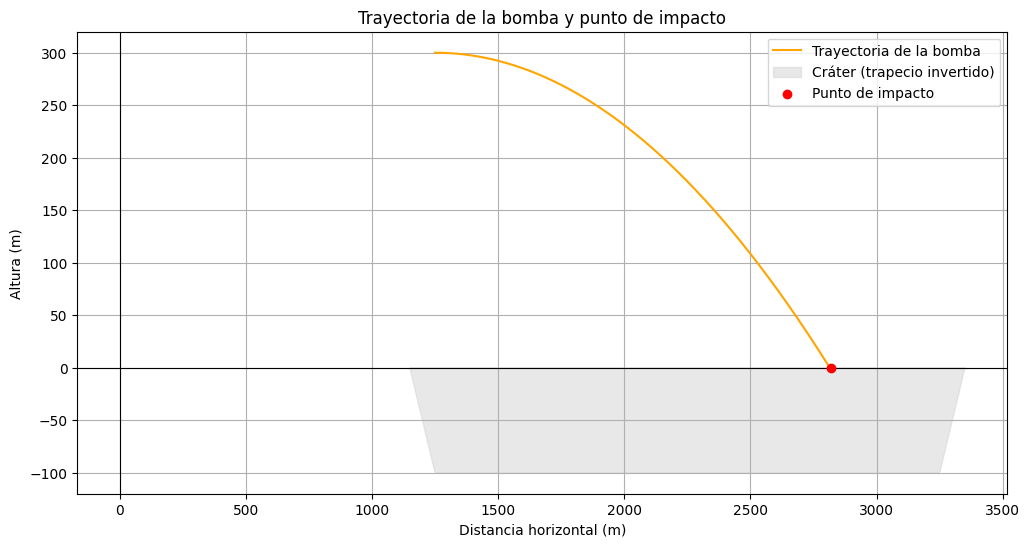

Punto de impacto: x = 2817.57 m, y = 0.00 m


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#hola

# Parámetros iniciales
ha = 300  # Altura inicial de la bomba
hc = -100  # Profundidad del cráter
L = 2000  # Longitud del cráter
alpha = np.radians(45)  # Ángulo del cráter en radianes
d = 1250  # Distancia inicial desde el punto de lanzamiento hasta el inicio del cráter
v0 = 200  # Velocidad inicial

# Componentes de la velocidad inicial
v0x = v0  # Velocidad horizontal
v0y = 0   # Velocidad vertical inicial

g = 9.81  # Aceleración gravitacional

# Función para calcular la trayectoria
def trayectoria(x, x0, y0, v0x, v0y):
    t = (x - x0) / v0x
    return y0 + v0y * t - 0.5 * g * t**2

# Función para calcular la altura del cráter en función de x
def altura_crater(x):
    if d <= x <= d + (hc / np.tan(alpha)):  # Lado izquierdo del cráter
        return np.tan(alpha) * (x - d)
    elif d + (hc / np.tan(alpha)) < x < d + L - (hc / np.tan(alpha)):  # Fondo plano
        return 0
    elif d + L - (hc / np.tan(alpha)) <= x <= d + L:  # Lado derecho del cráter
        return np.tan(-alpha) * (x - (d + L))
    return None  # Fuera del cráter

# Coordenadas del cráter
x_crater = [
    d,
    d + (hc / np.tan(alpha)),
    d + L - (hc / np.tan(alpha)),
    d + L
]
y_crater = [hc, 0, 0, hc]

# Trayectoria de la bomba
x0 = d
y0 = ha
x_trayectoria = np.linspace(x0, x0 + L + 2 * d, 1000)
y_trayectoria = trayectoria(x_trayectoria, x0, y0, v0x, v0y)

# Buscar el punto de impacto
impacto_x = None
impacto_y = None

for i in range(len(x_trayectoria)):
    x_actual = x_trayectoria[i]
    y_actual = y_trayectoria[i]
    y_crater_actual = altura_crater(x_actual)

    if y_crater_actual is not None and y_actual <= y_crater_actual + 1e-6:  # Impacto con el cráter
        impacto_x = x_actual
        impacto_y = y_crater_actual
        break
    elif y_actual <= 0:  # Impacto con el eje x
        impacto_x = x_actual
        impacto_y = 0
        break

# Visualización
if impacto_x is not None and impacto_y is not None:
    x_trayectoria_recortada = x_trayectoria[x_trayectoria <= impacto_x]
    y_trayectoria_recortada = y_trayectoria[:len(x_trayectoria_recortada)]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_trayectoria_recortada, y_trayectoria_recortada, label="Trayectoria de la bomba", color="orange")
    plt.fill(x_crater, y_crater, color="lightgrey", label="Cráter (trapecio invertido)", alpha=0.5)

    plt.scatter(impacto_x, impacto_y, color="red", label="Punto de impacto", zorder=5)

    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title("Trayectoria de la bomba y punto de impacto")
    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Punto de impacto: x = {impacto_x:.2f} m, y = {impacto_y:.2f} m")
else:
    print("No se encontró un impacto dentro del rango calculado.")


In [1]:
import matplotlib
matplotlib.use('TkAgg')  # Cambia el backend si es necesario
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import tkinter as tk
import signal
import sys

# Constante de gravedad
g = 9.81

# Funciones de la trayectoria de la bomba
def trayectoria(x, x0, y0, v0x, v0y):
    t = (x - x0) / v0x
    return y0 + v0y * t - 0.5 * g * t**2

def simular():
    # Obtener los valores de los parámetros desde la interfaz gráfica
    ha = float(entry_ha.get())
    hc = float(entry_hc.get())
    L = float(entry_L.get())
    alpha = np.radians(float(entry_alpha.get()))
    d = float(entry_d.get())
    v0 = float(entry_v0.get())

    # Cerrar la ventana de entrada
    root.destroy()

    # Coordenadas del cráter
    x_crater = [
        d,
        d + (hc / np.tan(alpha)),
        d + L - (hc / np.tan(alpha)),
        d + L
    ]
    y_crater = [hc, 0, 0, hc]

    # Trayectoria de la bomba
    x0 = d
    y0 = ha
    v0x = v0
    v0y = 0
    x_trayectoria = np.linspace(x0, x0 + L + 2 * d, 1000)
    y_trayectoria = trayectoria(x_trayectoria, x0, y0, v0x, v0y)

    # Detectar impacto
    impacto_x = None
    impacto_y = None
    impacto_con_crater = False
    for i in range(len(x_trayectoria)):
        # Si la bomba cae en el cráter (altura <= hc)
        if y_trayectoria[i] <= hc and d <= x_trayectoria[i] <= d + L:
            impacto_x = x_trayectoria[i]
            impacto_y = -100
            impacto_con_crater = True
            break
        # Si la bomba cae en el suelo (altura <= 0 fuera del cráter)
        elif y_trayectoria[i] <= 0:
            impacto_x = x_trayectoria[i]
            impacto_y = 0
            break

    # Posiciones a las que el avión se moverá
    posiciones = [1500, 2000, 2500, 3000, 3500, 4000, 4500]

    # Crear figura y ejes fuera del bucle para mantener una sola ventana emergente
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 5000)
    ax.set_ylim(hc - 50, ha + 50)

    # Dibujar el cráter
    ax.fill(x_crater, y_crater, color="lightgrey", label="Cráter (trapecio invertido)", alpha=0.5)

    # Ruta de la imagen del avión (asegúrate de que la imagen esté en el mismo directorio que este script)
    avion_imagen_ruta = r"avion.png"
    img = plt.imread(avion_imagen_ruta)

    # Añadir el marcador del avión en la posición inicial
    avion_marker = AnnotationBbox(OffsetImage(img, zoom=0.1), (posiciones[0], ha), frameon=False)
    ax.add_artist(avion_marker)

    # Elementos de la bomba y trayectoria
    bomba, = ax.plot([], [], 'ro', label="Bomba", markersize=8)
    trayectoria_line, = ax.plot([], [], color="orange", label="Trayectoria de la bomba")

    try:
        # Simulación del movimiento del avión y la caída de la bomba
        for x_avion in posiciones:
            # Actualizar la posición del avión
            avion_marker.xybox = (x_avion, ha)

            # Si el avión pasa la posición donde lanza la bomba
            if x_avion >= d:
                # Calcular la trayectoria desde el punto de lanzamiento
                t_lanzamiento = np.linspace(0, (x_avion - x0) / v0x, 1000)
                x_trayectoria_lanzamiento = x0 + v0x * t_lanzamiento
                y_trayectoria_lanzamiento = y0 - 0.5 * g * t_lanzamiento**2

                # Detectar el punto de impacto durante el vuelo
                impacto_detectado = False
                for j in range(len(x_trayectoria_lanzamiento)):
                    if y_trayectoria_lanzamiento[j] <= hc and d <= x_trayectoria_lanzamiento[j] <= d + L:
                        impacto_x = x_trayectoria_lanzamiento[j]
                        impacto_y = -100  # Ajustar para que caiga dentro del cráter en y = -100
                        impacto_detectado = True
                        break
                    elif y_trayectoria_lanzamiento[j] <= 0:
                        impacto_x = x_trayectoria_lanzamiento[j]
                        impacto_y = 0
                        impacto_detectado = True
                        break

                # Dibujar la trayectoria de la bomba hasta el punto de impacto
                if impacto_detectado:
                    trayectoria_line.set_data(x_trayectoria_lanzamiento[:j + 1], y_trayectoria_lanzamiento[:j + 1])
                    bomba.set_data([impacto_x], [impacto_y])
                else:
                    trayectoria_line.set_data(x_trayectoria_lanzamiento, y_trayectoria_lanzamiento)
                    bomba.set_data([x_trayectoria_lanzamiento[-1]], [y_trayectoria_lanzamiento[-1]])

            # Configurar y mostrar el gráfico en cada iteración
            plt.legend()
            plt.grid()
            plt.title(f"Movimiento del avión y trayectoria de la bomba (Posición: {x_avion} m)")
            plt.xlabel("Distancia horizontal (m)")
            plt.ylabel("Altura (m)")
            plt.draw()
            plt.pause(1.0)  # Pausa para que puedas ver cada etapa claramente

        plt.show(block=True)

    except KeyboardInterrupt:
        print("Simulación interrumpida por el usuario.")
        plt.close()
        sys.exit(0)

def signal_handler(sig, frame):
    print("Interrupción detectada. Cerrando el programa...")
    plt.close('all')
    
    try:
        root.quit()
        root.destroy()
    except tk.TclError:
        pass
    
    sys.exit(0)

# Configurar el manejador de señales
signal.signal(signal.SIGINT, signal_handler)

# Crear la ventana principal de Tkinter con tamaño doble y color verde
root = tk.Tk()
root.title("Simulación de Caída de Bomba")
root.geometry("800x400")  # Doble tamaño de ventana por defecto (400x200)
root.configure(bg='green')  # Color verde

# Crear etiquetas y campos de entrada para los parámetros con valores por defecto
tk.Label(root, text="Altura inicial del avión (ha)", bg='green').grid(row=0)
tk.Label(root, text="Altura del fondo del cráter (hc)", bg='green').grid(row=1)
tk.Label(root, text="Longitud horizontal del cráter (L)", bg='green').grid(row=2)
tk.Label(root, text="Ángulo de las paredes del cráter (alpha)", bg='green').grid(row=3)
tk.Label(root, text="Distancia inicial del avión desde el borde del cráter (d)", bg='green').grid(row=4)
tk.Label(root, text="Velocidad inicial de la bomba (v0)", bg='green').grid(row=5)

entry_ha = tk.Entry(root)
entry_hc = tk.Entry(root)
entry_L = tk.Entry(root)
entry_alpha = tk.Entry(root)
entry_d = tk.Entry(root)
entry_v0 = tk.Entry(root)

entry_ha.insert(10, "300")
entry_hc.insert(10, "-100")
entry_L.insert(10, "2000")
entry_alpha.insert(10, "45")
entry_d.insert(10, "1250")
entry_v0.insert(10, "400")

entry_ha.grid(row=0, column=1)
entry_hc.grid(row=1, column=1)
entry_L.grid(row=2, column=1)
entry_alpha.grid(row=3, column=1)
entry_d.grid(row=4, column=1)
entry_v0.grid(row=5, column=1)

# Botón para iniciar la simulación
tk.Button(root, text='Iniciar Simulación', command=simular).grid(row=6, column=1, pady=4)

# Iniciar el bucle principal de Tkinter
root.mainloop()